In [1]:
import cv2
import numpy as np
import skimage.io as si
import skimage.color as sc
import matplotlib.pyplot as plt

`(HSV)` (`Hue`, `Saturation`, `Value`, also known as `HSB` or `Hue`, `Saturation`, `Brightness`) is alternative representations of the `RGB` color model, designed in the 1970s by `computer graphics` researchers to more closely align with the way human vision perceives color-making attributes.

[Require_knowledge](https://github.com/Nhan121/Some-statistical-GANs-simulations-drafts-/blob/master/Image_processing%20%26%20computer_vision/Computer_vision/Image_Operations/Some%20boolean%20operators.ipynb)

## 1.From `BGR` and `RGB` to `HSV`.
### 1.1. `RGB` to `HSV` : `BGR2HSV`
#### 1.1.1. In `skimage`
$\qquad$ Firstly, we will focus on `how to change RGB to HSV with skimage.color.rbg2hsv()`

In [2]:
pixel = np.uint8([[[20, 40, 10]]])
sc.rgb2hsv(pixel)

array([[[0.27777778, 0.75      , 0.15686275]]])

Now, I will represent this transformation step-by-step for `skimage.color.rgb2hsv()`, [source](https://en.wikipedia.org/wiki/HSL_and_HSV#HSV_to_RGB)

$\qquad \diamond$ **Step 1. Changing range: From `[0, 255]` to `[0, 1]`.**

$$ \left( R', G', B' \right) = \left( \frac{R}{255}, \frac{G}{255}, \frac{B}{255} \right) $$

$\qquad \diamond$ **Step 2. `Range` of `normalized-pixel-value (R'G'B')`.**

$$ \Delta = C_{\max} - C_{\min} $$
where
$$ C_{\max} = \max \lbrace R', G', B' \rbrace \text{ and } C_{\min} = \min \lbrace R', G', B' \rbrace $$

$\qquad \diamond$ **Step 3. Calculate `H (Hue)`, `S (Saturation)` & `V: (Value)`**

$\qquad \qquad \circ$ **`Hue`**

$$ H = \left\lbrace \begin{array}{cl} \frac{1}{6} \left( \frac{G' - B'}{\Delta} + 0 \right) & \text{ if } C_{\max} = R' > C_{\min} \\  \frac{1}{6}\left( \frac{B' - R'}{\Delta} + 2 \right) & \text{ if } C_{\max} = G' > C_{\min} \\  \frac{1}{6}\left( \frac{R' - G'}{\Delta} + 4 \right) & \text{ if } C_{\max} = B' > C_{\min} \\ 0 & \text{otherwise, i.e., } C_{\max} = C_{\min} \end{array} \right. $$

where $ \frac{1}{6}$ is understood as `1/6 of 360 degree` or $60^0$

$\qquad \qquad \circ$ **`Satuaration`.**

$$ S = \left( \frac{\Delta}{C_{\max}} \right) \textbf{1}_{\lbrace C_{\max} \neq 0 \rbrace}. $$

$\qquad \qquad \circ$ **`Value`.**

$$ V = C_{\max} $$

In [3]:
R,G,B = cv2.split(pixel); print('Step 0. Spliting R, G, B \n\t R = %s, G = %s, B = %s'%(R, G, B))
""" ==================================================================================== """
Rs,Gs,Bs = R/255, G/255, B/255
print("Step 1. scaling R,G,B\n\t R' = %s, G' = %s, B' = %s"%(Rs, Gs, Bs))
""" ==================================================================================== """
print("Step 2. Find range")
Cmax = max(Rs, Bs, Gs)
Cmin = min(Rs, Bs, Gs)
Delta = Cmax - Cmin
print("\t Delta = %s"%Delta)
""" ==================================================================================== """
print("Step 3. Compute H,S,V.")
print("\t Cmax = G' > Cmin ?? %s"%((Cmax == Gs) & (Delta != 0)))
H = ((Bs - Rs)/Delta + 2)/6; print("\t Hue = ", H)
S = Delta / Cmax; print("\t Saturation = ",S)
V = Cmax; print("\t Value = ", V)
""" ==================================================================================== """
print("Verify the skimage.color.rgb2hsv:\n\t (H,S,V) = ", sc.rgb2hsv(pixel))

Step 0. Spliting R, G, B 
	 R = [[20]], G = [[40]], B = [[10]]
Step 1. scaling R,G,B
	 R' = [[0.07843137]], G' = [[0.15686275]], B' = [[0.03921569]]
Step 2. Find range
	 Delta = [[0.11764706]]
Step 3. Compute H,S,V.
	 Cmax = G' > Cmin ?? [[ True]]
	 Hue =  [[0.27777778]]
	 Saturation =  [[0.75]]
	 Value =  [[0.15686275]]
Verify the skimage.color.rgb2hsv:
	 (H,S,V) =  [[[0.27777778 0.75       0.15686275]]]


#### 1.1.2. In `OpenCV`.
$\qquad$ Noting that in `OpenCV`, the range of `HSV` is different to in `skimage.color`, where

$\qquad \qquad \diamond$ **`H: Hue` in OpenCV** is from 0 to 180.

$\qquad \qquad \diamond$ **`S: Satuaration` in OpenCV** is from 0 to 255.

$\qquad \qquad \diamond$ **`V: Value` in OpenCV** is from 0 to 255.

Hence,

$$ \left( H, S, V \right)_{\text{OpenCV}} = \text{uint8} \left( 180*H, 255*S, 255*V \right)_{\text{skimage.color}} $$

Now, verify the statement with `cv2.cvtColor(pixel_image, cv2.COLOR_RGB2HSV)`

In [4]:
print("RGB->HSV using OpenCV: \n\t", cv2.cvtColor(pixel, cv2.COLOR_RGB2HSV))
print("RGB->HSV from skimage.color after multiplying \n\t", np.uint8(H*180), np.uint8(S*255), np.uint8(V*255))

RGB->HSV using OpenCV: 
	 [[[ 50 191  40]]]
RGB->HSV from skimage.color after multiplying 
	 [[50]] [[191]] [[40]]


### 1.2. `BGR` to `HSV`
$\qquad$ Since, loading image using `OpenCV` returns the `BGR color-spaces`, hence the `flag`:`cv2.COLOR_BGR2HSV` is only appeared in `OpenCV`, until now; and how it works?

$\qquad$ This is very easy,

            (BGR -> HSV) = (BGR -> RGB) -> HSV
            
            i.e.,
            
              BGR2HSV   =  BGR2RGB   then  RGB2HSV

In [5]:
print("(BGR->HSV) using OpenCV: \n\t", 
      cv2.cvtColor(pixel, cv2.COLOR_BGR2HSV))
pix_2rgb = cv2.cvtColor(pixel, cv2.COLOR_BGR2RGB)
print("(RGB->BGR) then (BGR->HSV) using OpenCV: \n\t", 
      cv2.cvtColor(pix_2rgb, cv2.COLOR_RGB2HSV))
print("pixel initial in BGR = %s\npixel after convert to RGB = %s"%
      (pixel, pix_2rgb))

(BGR->HSV) using OpenCV: 
	 [[[ 70 191  40]]]
(RGB->BGR) then (BGR->HSV) using OpenCV: 
	 [[[ 70 191  40]]]
pixel initial in BGR = [[[20 40 10]]]
pixel after convert to RGB = [[[10 40 20]]]


### 1.3. `HSV` to `RGB`
#### 1.3.1. Using `skimage.color`

In [6]:
pixel = np.uint8([[[20, 40, 10]]])
sc.hsv2rgb(sc.rgb2hsv(pixel))
np.uint8(255*sc.hsv2rgb(sc.rgb2hsv(pixel)))

array([[[20, 40, 10]]], dtype=uint8)

#### 1.3.2. Using `OpenCV`

In [7]:
pixel = np.uint8([[[50, 191, 40]]])
cv_bgr2rgb_px = cv2.cvtColor(pixel, cv2.COLOR_HSV2RGB)
cv_bgr2rgb_px

array([[[20, 40, 10]]], dtype=uint8)

### EXERCISEs.
####  Exercise 1.1. `RGB -> HSV` of `Red`
$\qquad$ In this exercise, you are asked to write a function to display the `HSV-output` of the different `red_pixel_input`, for instance `red_pix = {255,215,175,135,95,55}`

$\qquad$ You must display the `red (in HSV values)` by using `skimage` and `OpenCV` under `matplotlib`, beside the `red (in RGB values)`.

**SOLUTION.**

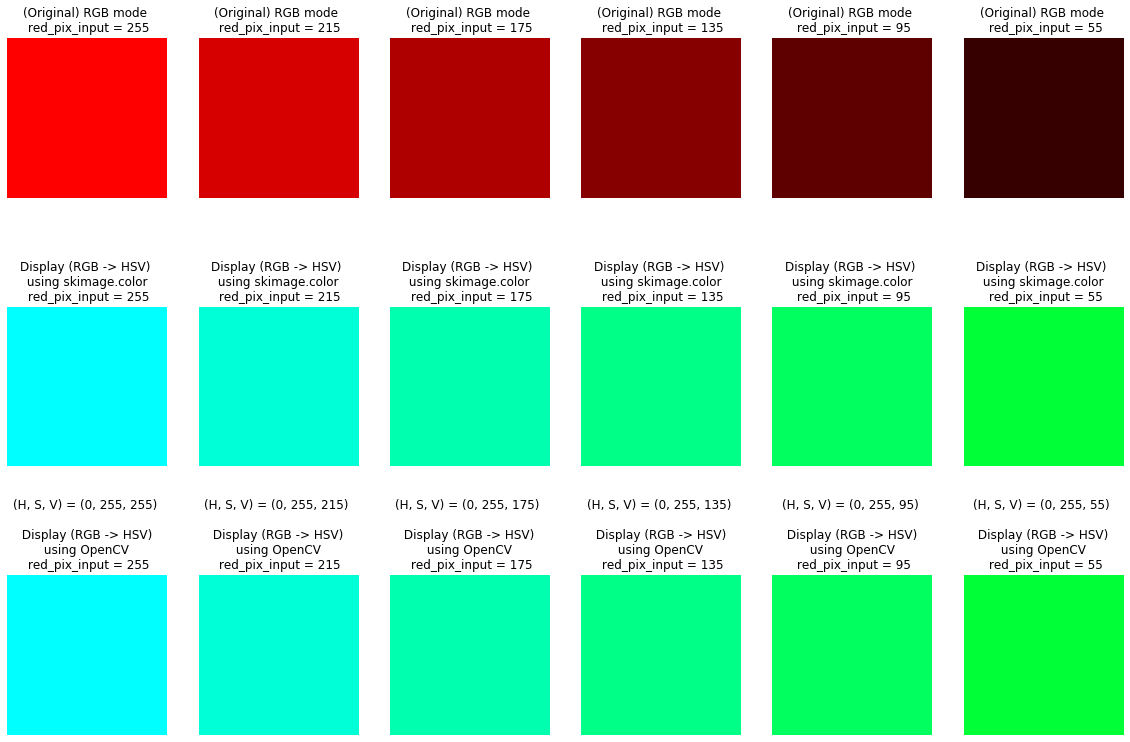

In [8]:
def to_hsv_display(channel):
    """
        This function is used to illustrate the change of HSV of red,green,blue-pixel
        when using OpenCV and skimage.color
        params: channel (int) takes values {0, 1, 2} corresponding to Red, Green, Blue.
    """
    if channel == 0:
        str_pix = 'red_pix_input'
    elif channel == 1:
        str_pix = 'green_pix_input'
    elif channel == 2:
        str_pix = 'blue_pix_input'
    else:
        end;
    plt.figure(figsize = (20, 14))
    for k in range(6):
        img_k = np.zeros((5,5,3), dtype= np.uint8)
        pix = 255 - k*40
        img_k[:,:,channel] = pix

        plt.subplot(3,6,k+1); plt.imshow(img_k); plt.axis("off")
        plt.title("(Original) RGB mode \n %s = %s"%(str_pix, pix))

        plt.subplot(3,6,k+7); img_sc_rgb2hsv = sc.rgb2hsv(img_k)
        plt.imshow(img_sc_rgb2hsv); plt.axis("off")
        plt.title("Display (RGB -> HSV) \n using skimage.color \n %s = %s"%(str_pix, pix))

        plt.subplot(3,6,k+13); img_cv2_RGB2HSV = cv2.cvtColor(img_k, cv2.COLOR_RGB2HSV)
        plt.imshow(img_cv2_RGB2HSV); plt.axis("off")    
        H, S, V = img_cv2_RGB2HSV[0, 0]
        plt.title("(H, S, V) = (%s, %s, %s) \n\n Display (RGB -> HSV) \n using OpenCV \n %s = %s"
                  %(H, S, V, str_pix, pix))
        
to_hsv_display(0)

#### Exercise 1.2. Do the same thing as in Exercise 1.1 but for `blue, green-channels` 
$\qquad $ **`Green channel`.**

**SOLUTION.**

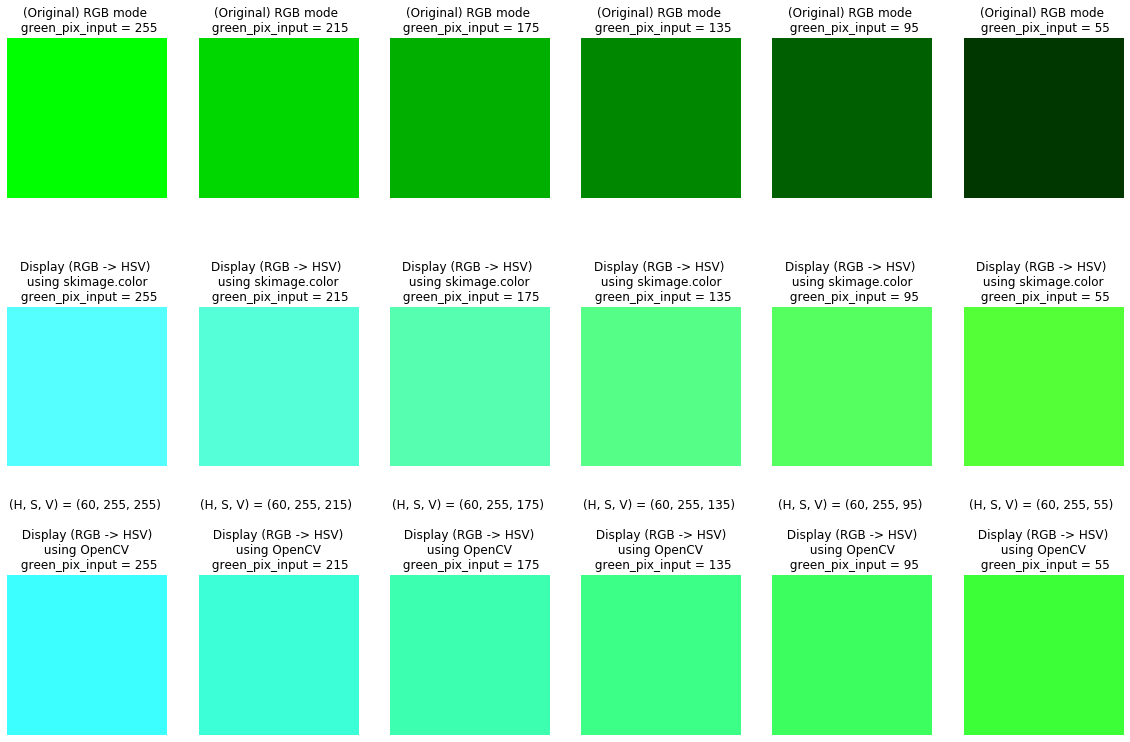

In [9]:
to_hsv_display(1)

$\qquad $ **`Blue channel`.**

**SOLUTION.**

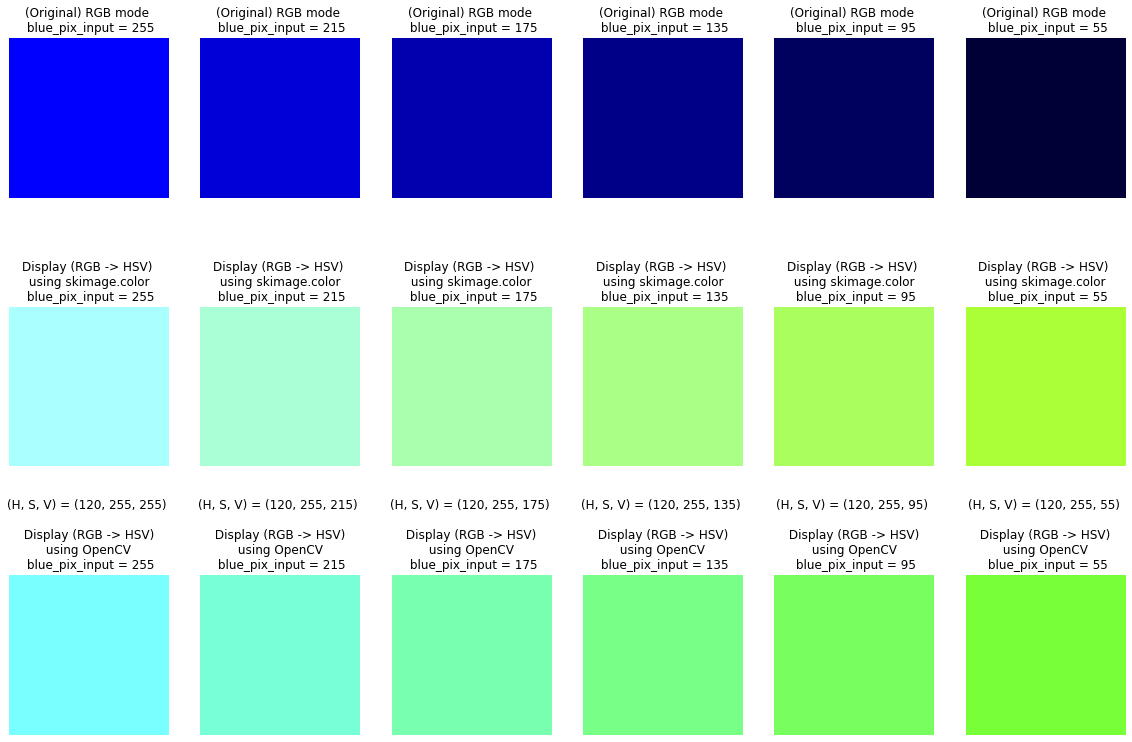

In [10]:
to_hsv_display(2)

#### Exercise 1.3. Range of yellow in `HSV`
$\qquad$ In this exercise, you are asked to find the range of yellow-pixel in `HSV color-space`; supposed that the range in `RGB` is from `[200, 200, 0]` to `[255, 255, 0]`.

$\qquad$ You must show the images of `yellow` and its corresponding `RGB` and `HSV` values on the `yellow-pixel` loaded in `RGB`!

$\qquad$ Remember! I don't ask you to display the `yellow-pixel (in HSV)` as in the previous exercises.

**SOLUTION.**

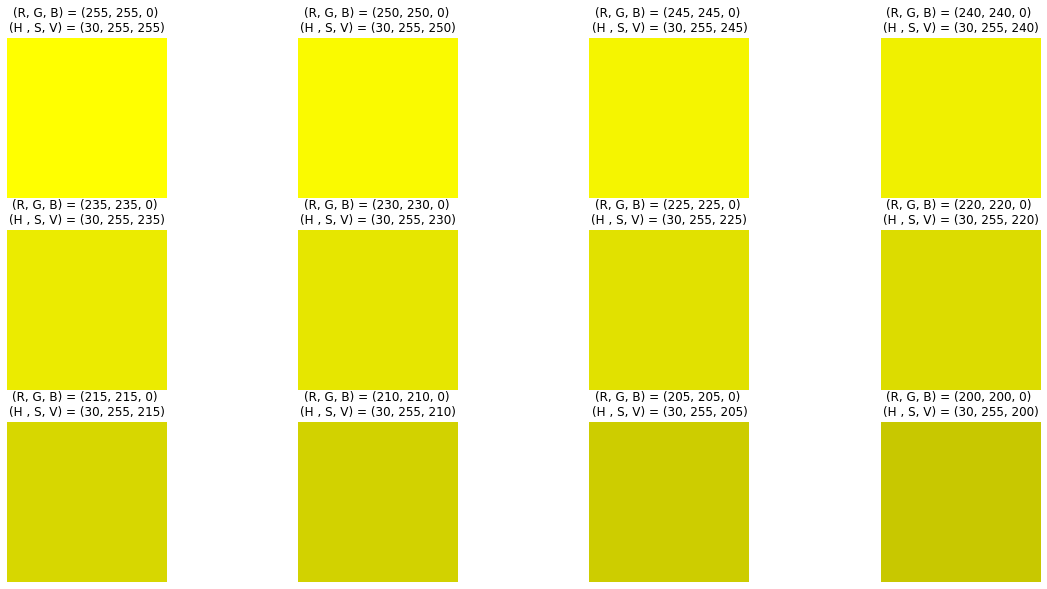

In [11]:
black = np.zeros((5,5,3), dtype = np.uint8)
plt.figure(figsize = (20, 10))
for k in range(12):
    plt.subplot(3, 4, k+1)
    yellow = black.copy()
    yellow[:, :, 1] = 255 - 5*k 
    yellow[:, :, 0] = 255 - 5*k
    plt.imshow(yellow)
    R, G, B = yellow[0, 0]
    H, S, V = cv2.cvtColor(yellow, cv2.COLOR_RGB2HSV)[0, 0]
    plt.title('(R, G, B) = (%d, %d, %d) \n(H , S, V) = (%d, %d, %d)'%(R, G, B, H, S, V))
    plt.axis("off")

**Comments.** By the results, we can see the `upper` and `lower` of `yellow` in this `RGB_range: [200, 200, 0] --> [255, 255, 0]` is

                            upper_yellow = [ 30, 255, 255 ]
                            lower_yellow = [ 30, 255, 200 ]

#### Exercise 1.4. Range of `violet` in `HSV`.
$\qquad$ In this exercise, you are asked to do the same thing as in the previous (1.3.) with the target be `violet-pixel` with `range_assumption:` `(R, G, B)` from `(170, 70, 170)` to `(255, 155, 255)`.

**SOLUTION.**

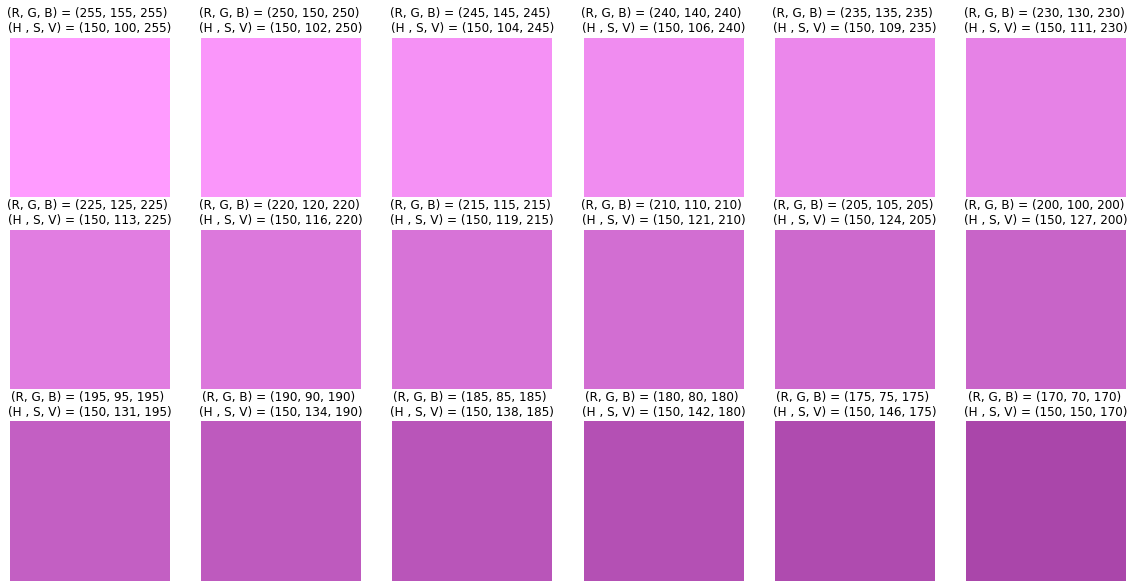

In [12]:
black = np.zeros((5,5,3), dtype = np.uint8)
plt.figure(figsize = (20, 10))
for k in range(18):
    plt.subplot(3, 6, k+1)
    yellow = black.copy()
    yellow[:, :, 0] = 255 - 5*k 
    yellow[:, :, 1] = 155 - 5*k
    yellow[:, :, 2] = 255 - 5*k
    plt.imshow(yellow)
    R, G, B = yellow[0, 0]
    H, S, V = cv2.cvtColor(yellow, cv2.COLOR_RGB2HSV)[0, 0]
    plt.title('(R, G, B) = (%d, %d, %d) \n(H , S, V) = (%d, %d, %d)'%(R, G, B, H, S, V))
    plt.axis("off")

## 2. Apply `BGR2HSV` to extract object-range-color.
### 2.1 General technique
- **Step 1.** Determine the upper and lower of the range that you want to extract
- **Step 2.** Use `cv2.InRange()` function to mask your image
- **Step 3.** Use `cv2.bitwise_and()` to extract images based on mask

Now, we consider the first example in this part: `Extract the grass from the following images`

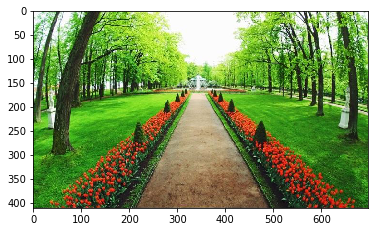

In [13]:
path = r"C:\Users\Admin\Desktop\mang.jpg"
im = si.imread(path)
plt.imshow(im);

$\qquad$ **Step 1.** Choose a subset-region of the grass from the image above, for instance `img[200:250, 100:200]`

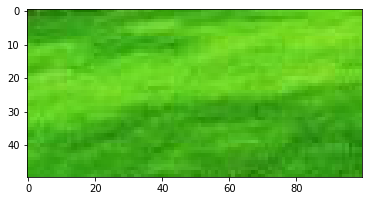

In [14]:
sub_range = im[200:250, 100:200]
plt.imshow(sub_range);

$\qquad$ Next, convert the `img[200:250, 100:200]` to `HSV` then find the `upper_green` and `lower_green`

In [15]:
hsv_sub_range = cv2.cvtColor(sub_range, cv2.COLOR_RGB2HSV)
lower_green = np.array([hsv_sub_range[:,:,0].min(), hsv_sub_range[:,:,1].min(), hsv_sub_range[:,:,2].min()])
upper_green = np.array([hsv_sub_range[:,:,0].max(), hsv_sub_range[:,:,1].max(), hsv_sub_range[:,:,2].max()])

print(lower_green, upper_green)

[ 45 173 106] [ 54 255 233]


$\qquad$ **Step 2. Use `cv2.InRange`** with the following `syntax`

                    cv2.InRange(image, lower_pixel, upper_pixel)

$\qquad \qquad$ The `cv2.InRange()` function returns `0` and `255` where

$\qquad \qquad \qquad \diamond$ `0` if the `pixel in image` **is out of** the `Range` limited by `lower_pixel` and `upper_pixel`

$\qquad \qquad \qquad \diamond$ `255` otherwise, meant `InRange = True`

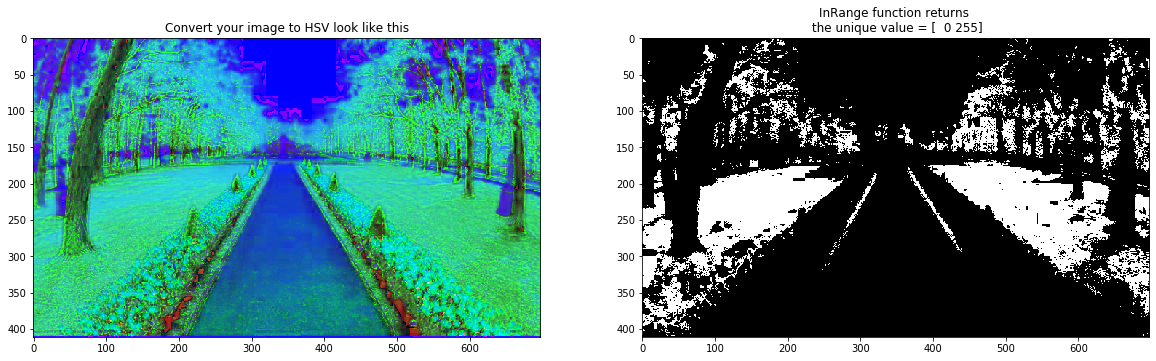

In [16]:
## Convert your orginial image to HSV and alias by img_hsv
img_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

## create mask with InRange function
mask_green = cv2.inRange(img_hsv, lower_green, upper_green)

plt.figure(figsize = (20, 6))
plt.subplot(121); 
plt.imshow(img_hsv); plt.title('Convert your image to HSV look like this')

plt.subplot(122); 
plt.imshow(mask_green, cmap = 'gray'); 
plt.title('InRange function returns \n the unique value = %s'%(np.unique(mask_green)))
plt.show()

$\qquad$ **Step 3. Convert & extract with `cv2.bitwise_and()`**

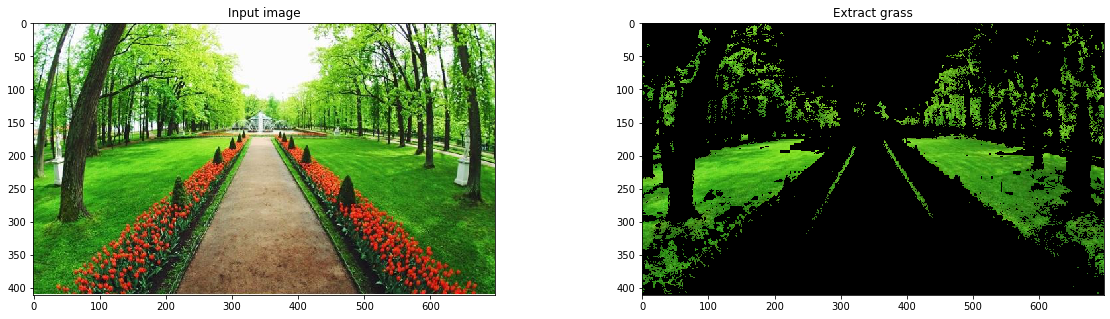

In [17]:
## convert & extract
ext_green = cv2.bitwise_and(im, im, mask = mask_green)

plt.figure(figsize = (20, 5))
plt.subplot(121), plt.imshow(im); plt.title('Input image')
plt.subplot(122), plt.imshow(ext_green); plt.title('Extract grass')
plt.show()

### 2.2. EXERCISEs.
#### Exercise 2.1. Extract the `grass` in the following image

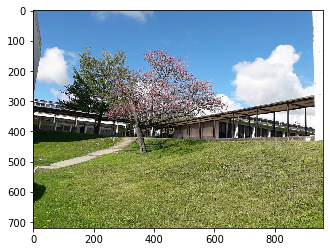

In [18]:
path = r"C:\Users\Admin\Desktop\view.jpg"
im = si.imread(path)
plt.imshow(im);

$\qquad$ **SOLUTION.**

[28 47 69] [ 42 255 234]


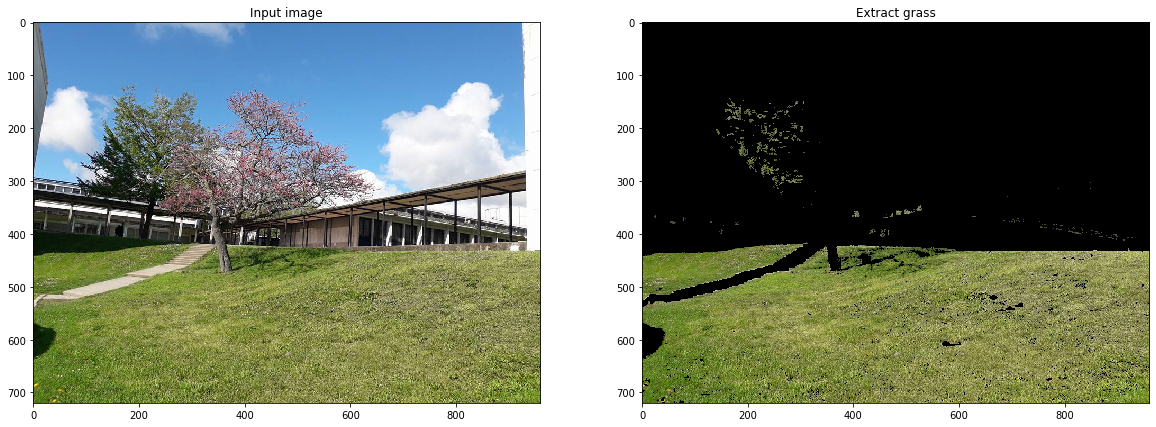

In [19]:
## Choose the range to representation the grass
sub_range = im[450:500, 0:100]

## convert the range to HSV
hsv_sub_range = cv2.cvtColor(sub_range, cv2.COLOR_RGB2HSV)

## calculate the upper & lower
lower_green = np.array([hsv_sub_range[:,:,0].min(), hsv_sub_range[:,:,1].min(), hsv_sub_range[:,:,2].min()])
upper_green = np.array([hsv_sub_range[:,:,0].max(), hsv_sub_range[:,:,1].max(), hsv_sub_range[:,:,2].max()])

## print out results of the range_of_green
print(lower_green, upper_green)

## Convert your orginial image to HSV and alias by img_hsv
img_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

## create mask with InRange function
mask_green = cv2.inRange(img_hsv, lower_green, upper_green)

## convert & extract
ext_green = cv2.bitwise_and(im, im, mask = mask_green)

plt.figure(figsize = (20, 8))
plt.subplot(121), plt.imshow(im); plt.title('Input image')
plt.subplot(122), plt.imshow(ext_green); plt.title('Extract grass')
plt.show()

#### Exercise 2.2. Extract the `blue sky` [ without `cloud (white region)`]

$\qquad$ **SOLUTION.**

[100  92 194] [106 160 253]


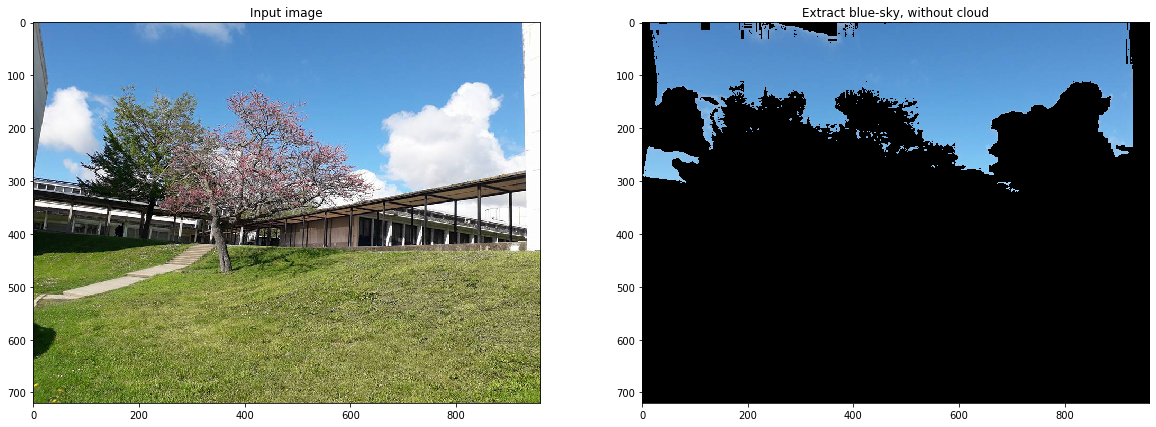

In [20]:
## Choose the range to representation the sky
sub_range = im[:270, 600:650]

## convert the range to HSV
hsv_sub_range = cv2.cvtColor(sub_range, cv2.COLOR_RGB2HSV)

## calculate the upper & lower
lower_blue = np.array([hsv_sub_range[:,:,0].min(), hsv_sub_range[:,:,1].min(), hsv_sub_range[:,:,2].min()])
upper_blue = np.array([hsv_sub_range[:,:,0].max(), hsv_sub_range[:,:,1].max(), hsv_sub_range[:,:,2].max()])

## print out results of the range_of_sky
print(lower_blue, upper_blue)

## Convert your orginial image to HSV and alias by img_hsv
img_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

## create mask with InRange function
mask_blue = cv2.inRange(img_hsv, lower_blue, upper_blue)

## convert & extract
ext_sky = cv2.bitwise_and(im, im, mask = mask_blue)

plt.figure(figsize = (20, 8))
plt.subplot(121), plt.imshow(im); plt.title('Input image')
plt.subplot(122), plt.imshow(ext_sky); plt.title('Extract blue-sky, without cloud')
plt.show()